In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date

In [ ]:
df = pd.read_csv('popes.csv')


def to_pydate(s):
    if not isinstance(s, str):
        return s
    try:
        return datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ")
    except Exception:
        return None

# Ran into issues with np datetime64 parsing the timestamps. switched to datetime for now
df['start'] = df['start'].apply(to_pydate)
df['end'] = df['end'].apply(to_pydate)
df['birth'] = df['birth'].apply(to_pydate)

# Matplotlib struggles with early dates, so let's ignore the first 100 years
df = df[df['start'].apply(lambda d: isinstance(d, datetime) and d.year >= 100)]


<Axes: title={'center': 'Pope Tenure'}, xlabel='number'>

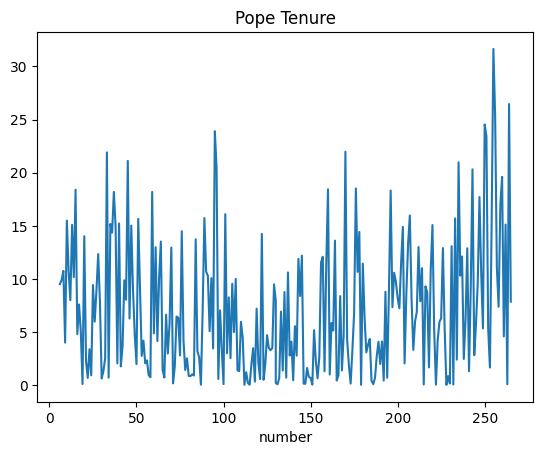

In [49]:
df.plot(x='number', y='tenure', kind='line', legend=False, title='Pope Tenure')

In [50]:
tenure_stats = df['tenure'].agg(['median', 'min', 'max', 'std'])
print(tenure_stats)

median     5.369863
min        0.032877
max       31.646575
std        6.281026
Name: tenure, dtype: float64


<Axes: title={'center': 'Distribution of Pope Tenure'}, ylabel='Frequency'>

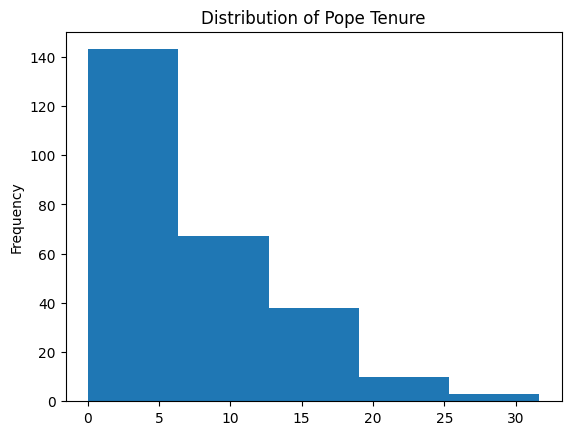

In [51]:
std = tenure_stats['std']
bins=int((df['tenure'].max() - df['tenure'].min()) / std)
df['tenure'].plot(kind='hist', bins=bins, title='Distribution of Pope Tenure')

<Axes: title={'center': 'Distribution of Pope Age at Inauguration'}, xlabel='Age at Inauguration (years)', ylabel='Frequency'>

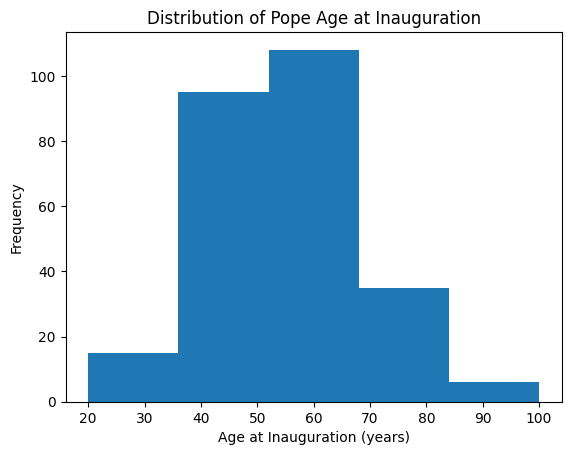

In [52]:
df['age_start'].plot(
    kind='hist',
    bins=bins,
    title='Distribution of Pope Age at Inauguration',
    xlabel='Age at Inauguration (years)'
)

<Axes: title={'center': 'Pope Age at Inauguration vs Tenure'}, xlabel='age_start', ylabel='tenure'>

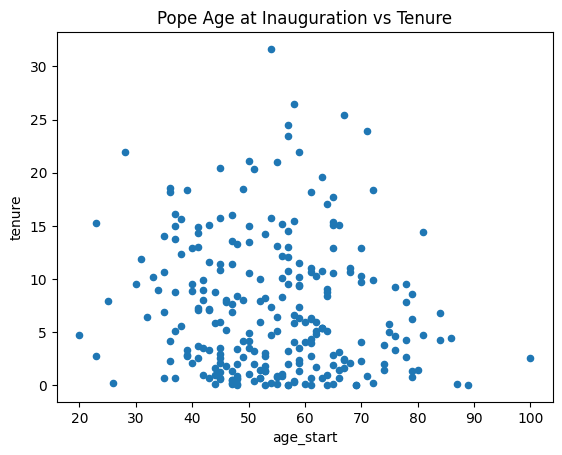

In [53]:
df.plot.scatter(x='age_start', y='tenure', title='Pope Age at Inauguration vs Tenure')

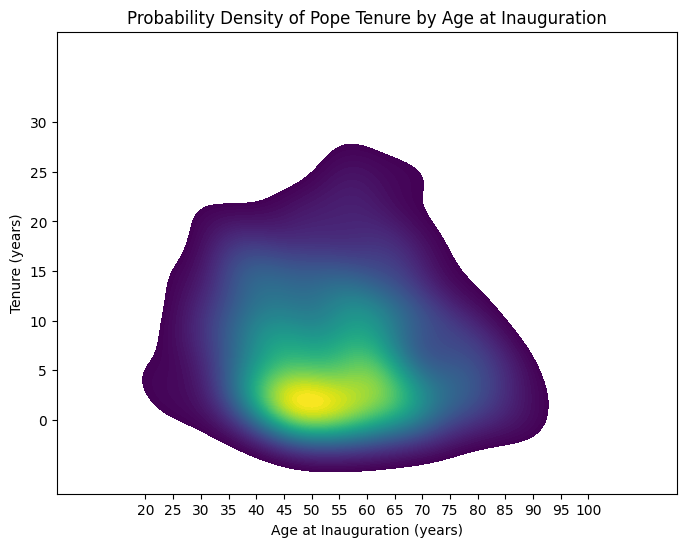

In [54]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x='age_start',
    y='tenure',
    fill=True,
    cmap='viridis',
    thresh=0.05,
    levels=100
)
plt.title('Probability Density of Pope Tenure by Age at Inauguration')
plt.xlabel('Age at Inauguration (years)')
plt.ylabel('Tenure (years)')

# Set x-ticks to 5 year increments
min_age = int(np.floor(df['age_start'].min() // 5 * 5))
max_age = int(np.ceil(df['age_start'].max() // 5 * 5))
plt.xticks(np.arange(min_age, max_age + 1, 5))

# Set y-ticks to 5 year increments
min_tenure = int(np.floor(df['tenure'].min() // 5 * 5))
max_tenure = int(np.ceil(df['tenure'].max() // 5 * 5))
plt.yticks(np.arange(min_tenure, max_tenure + 1, 5))

plt.show()

In [55]:
print(df['start'].min(), df['start'].max())


0105-10-27 00:00:00 2013-03-13 00:00:00


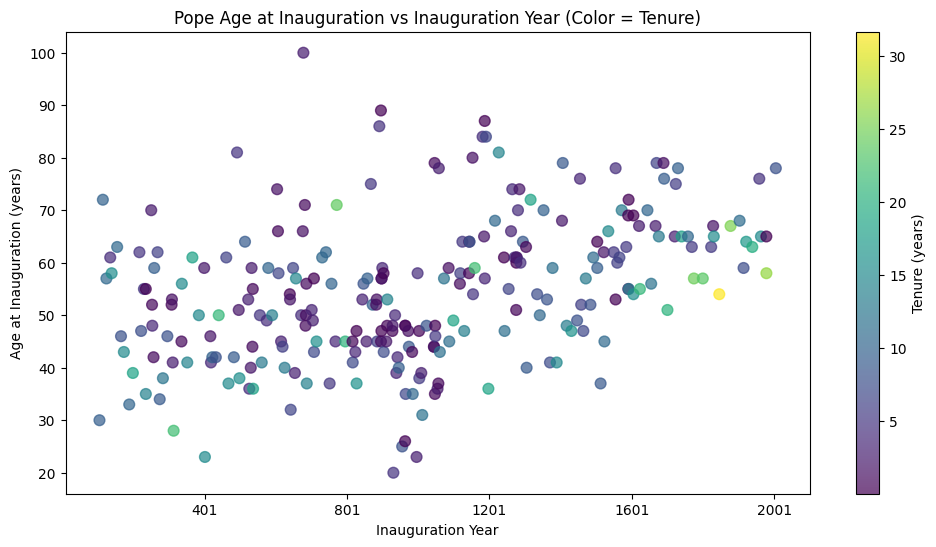

In [56]:

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df['start'], df['age_start'],
    c=df['tenure'], cmap='viridis', s=60, alpha=0.7
)
plt.colorbar(scatter, label='Tenure (years)')
plt.xlabel('Inauguration Year')
plt.ylabel('Age at Inauguration (years)')
plt.title('Pope Age at Inauguration vs Inauguration Year (Color = Tenure)')

# plt.tight_layout()
plt.show()

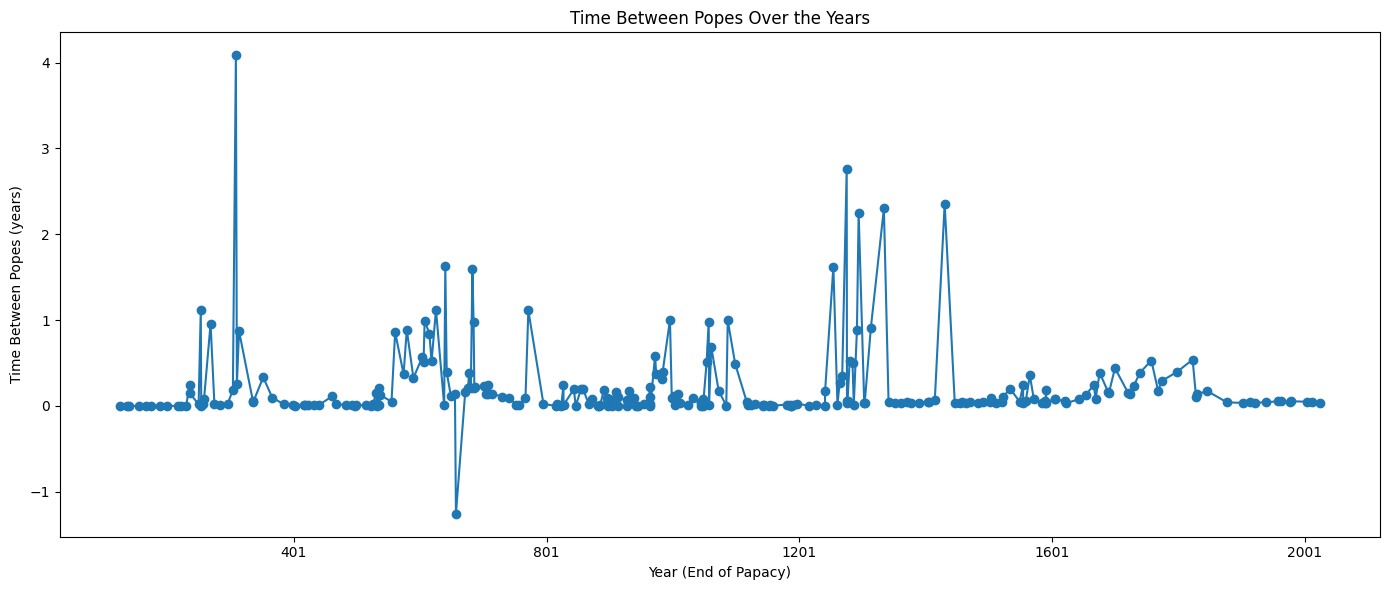

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

# --- Helpers ---
def to_pydate(s):
    if not isinstance(s, str):
        return s
    try:
        return datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ")
    except Exception:
        return None

def timedelta_to_years(td):
    if pd.isna(td):
        return None
    return td.days / 365.25  # Approximate, accounts for leap years

# --- Apply date conversion ---
df['start'] = df['start'].apply(to_pydate)
df['end'] = df['end'].apply(to_pydate)
df['birth'] = df['birth'].apply(to_pydate)

# --- Filter valid dates ---
# df = df[df['start'].apply(lambda d: isinstance(d, datetime) and d.year >= 100)]
# df = df[df['end'].apply(lambda d: isinstance(d, datetime) and d.year >= 100)]

# --- Sort and calculate gaps ---
df_sorted = df.sort_values('start')
df_sorted['gap'] = df_sorted['start'] - df_sorted['end'].shift(1)
df_sorted['gap_years'] = df_sorted['gap'].apply(timedelta_to_years)

# --- Optional: filter for valid plotting rows ---
# plot_df = df_sorted.dropna(subset=['gap_years'])

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_sorted['end'], df_sorted['gap_years'], marker='o', linestyle='-')
plt.xlabel('Year (End of Papacy)')
plt.ylabel('Time Between Popes (years)')
plt.title('Time Between Popes Over the Years')
plt.tight_layout()
plt.show()

# Pope overlap

Eugene I overlapped with pope Martin I. Eugene I was chosen to become Pope after the deposition and banishment of Martin I by Emperor Constans II over the dispute about Monothelitism. 

Monothelitism is the doctrine that Jesus had one, devine will as opposed to the current and former accepted belief that he had two, devine and human.

Martin I was outspoken against monothelitism and was ousted by the emperor, where Eugene I stayed mum.

In [58]:
df_sorted[df_sorted['gap_years'] < 0]


,number,name_full,name,suffix,canonization,birth,start,end,age_start,age_end,tenure,gap,gap_years
74,75,Eugene I,Eugene,1,Saint,0615-06-30 00:00:00,0654-08-10 00:00:00,0657-06-02 00:00:00,39.0,41.0,2.810959,"-459 days, 0:00:00",-1.256674


# Big Pope Gaps!

1. Marcellus I's longest gap was due to major christian persecution in Rome making it hard to have a pope for a few years
2. Gregory X's gap was the longest papal election in history
3. Martin V's long gap is not explained, but may be due to the end of Western Schism (the antipope!) and reuniting the church
4. John XXII's long gap was due to infighting with cardinals, only resolved when they were locked in a room and couldn't leave until they picked a pope

In [59]:
df_sorted[df_sorted['gap_years'] > 1].sort_values('gap_years', ascending=False)


,number,name_full,name,suffix,canonization,birth,start,end,age_start,age_end,tenure,gap,gap_years
29,30,Marcellus I,Marcellus,1,Saint,0255-06-30 00:00:00,0308-05-27 00:00:00,0309-01-16 00:00:00,52.0,53.0,0.641096,"1492 days, 0:00:00",4.084873
184,184,Gregory X,Gregory,10,Blessed,1210-06-30 00:00:00,1271-09-01 00:00:00,1276-01-10 00:00:00,61.0,65.0,4.357923,"1006 days, 0:00:00",2.754278
206,206,Martin V,Martin,5,NaN,1369-06-30 00:00:00,1417-11-11 00:00:00,1431-02-20 00:00:00,48.0,61.0,13.276712,"861 days, 0:00:00",2.357290
196,196,John XXII,John,22,NaN,1244-06-30 00:00:00,1316-08-07 00:00:00,1334-12-04 00:00:00,72.0,90.0,18.326027,"840 days, 0:00:00",2.299795
192,192,Celestine V,Celestine,5,Saint,1210-01-01 00:00:00,1294-07-05 00:00:00,1294-12-13 00:00:00,NaN,NaN,0.441096,"822 days, 0:00:00",2.250513
70,71,Severinus,Severinus,1,NaN,0585-06-30 00:00:00,0640-05-28 00:00:00,0640-08-02 00:00:00,54.0,55.0,0.180822,"594 days, 0:00:00",1.626283
180,180,Innocent IV,Innocent,4,NaN,1195-06-30 00:00:00,1243-06-25 00:00:00,1254-12-07 00:00:00,47.0,59.0,11.452055,"592 days, 0:00:00",1.620808
79,80,Leo II,Leo,2,Saint,0611-06-30 00:00:00,0682-08-17 00:00:00,0683-07-03 00:00:00,71.0,72.0,0.876712,"584 days, 0:00:00",1.598905
20,21,Cornelius,Cornelius,1,Saint,0180-06-30 00:00:00,0251-03-06 00:00:00,0253-06-25 00:00:00,70.0,72.0,2.304110,"410 days, 0:00:00",1.122519
68,69,Boniface V,Boniface,5,NaN,0575-06-30 00:00:00,0619-12-23 00:00:00,0625-10-25 00:00:00,44.0,50.0,5.838356,"410 days, 0:00:00",1.122519
